In [6]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [7]:
house_df = pd.read_csv("../data/raw/train-house-prices-advanced-regression-techniques.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
print(house_df.shape)

(1460, 81)


In [9]:
house_df.select_dtypes(exclude=['number']).shape[1]

43

In [10]:
house_df.select_dtypes(exclude=['number']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

This is a for loop that iterates through each column in the DataFrame, and if the column has fewer than 50 unique values, it prints the column name, its unique values, and their counts

In [10]:
n_colums = 0
cols = []
for idx, col in enumerate(house_df.columns[1:]):
    unique_vals = house_df[col].value_counts()
    not_null_count = house_df[col].notnull().sum()
    if len(unique_vals) < 50:
        n_colums += 1
        print(f"{idx+1}. Number of non-null rows of column {col}: {not_null_count} / {house_df.shape[0]}")
        print(unique_vals)
        print("\n")
    else:
        cols.append(col)
print(f"Total number of columns with less than 50 unique values: {n_colums} / {house_df.shape[1]}")

1. Number of non-null rows of column MSSubClass: 1460 / 1460
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


2. Number of non-null rows of column MSZoning: 1460 / 1460
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


5. Number of non-null rows of column Street: 1460 / 1460
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


6. Number of non-null rows of column Alley: 91 / 1460
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


7. Number of non-null rows of column LotShape: 1460 / 1460
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


8. Number of non-null rows of column LandContour: 1460 / 1460
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


9. Number of non-null rows of column Util

In [12]:
# columns with more than 50 unique values
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

## EDA

In [ ]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1.0, 'Sales')

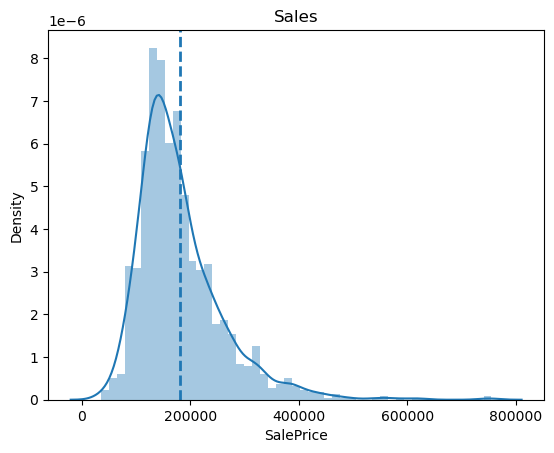

In [ ]:
# target variable
sns.distplot(house_df["SalePrice"])
plt.axvline(x=house_df["SalePrice"].mean(), linestyle="--", linewidth=2)
plt.title("Sales")

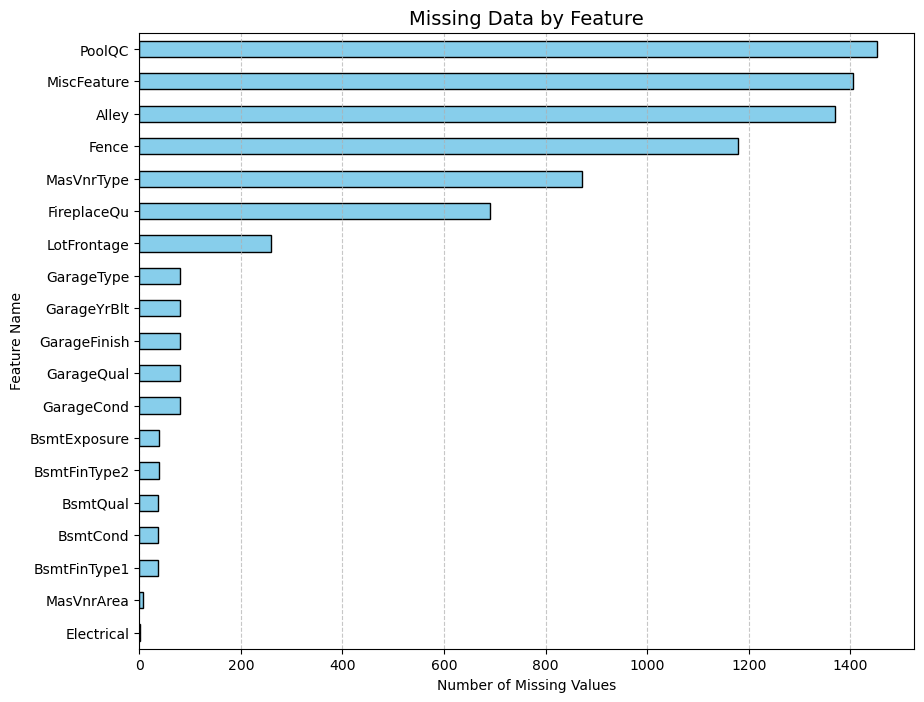

In [ ]:
# Checking missing values (horizontal view)
missing = house_df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing.plot.barh(color='skyblue', edgecolor='black')
plt.title("Missing Data by Feature", fontsize=14)
plt.xlabel("Number of Missing Values")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


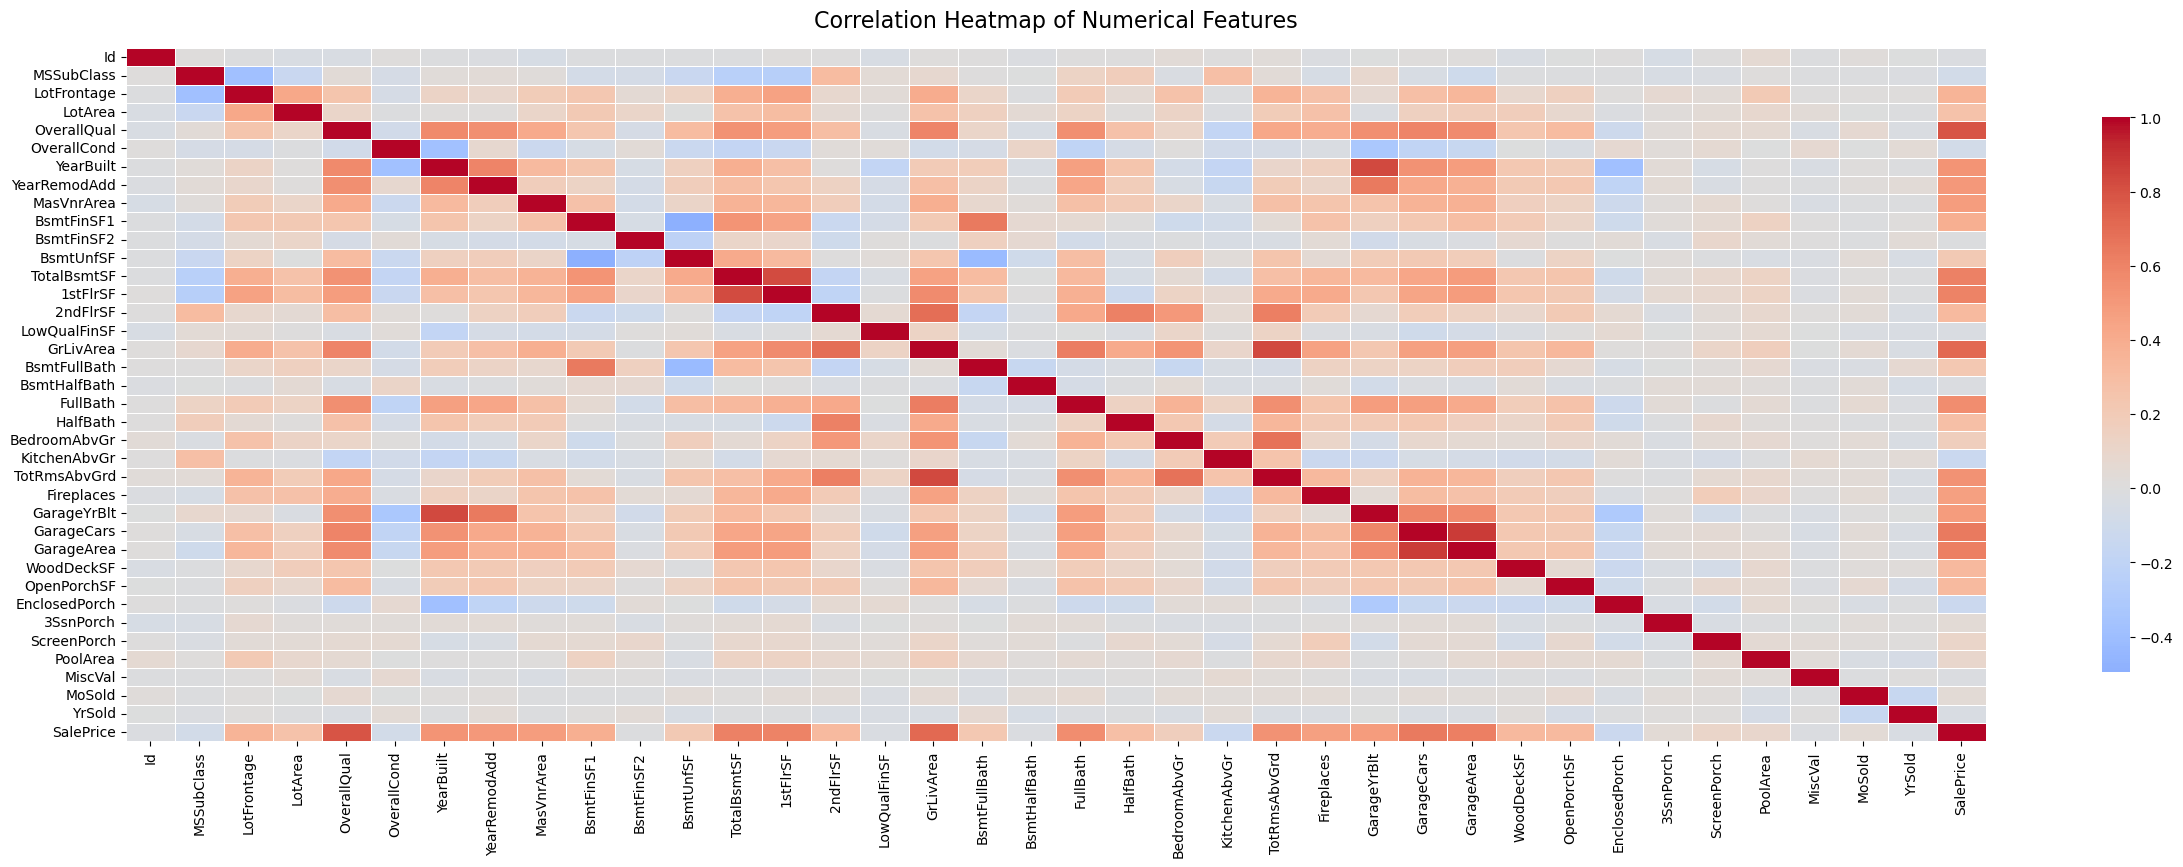

In [ ]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    house_df.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


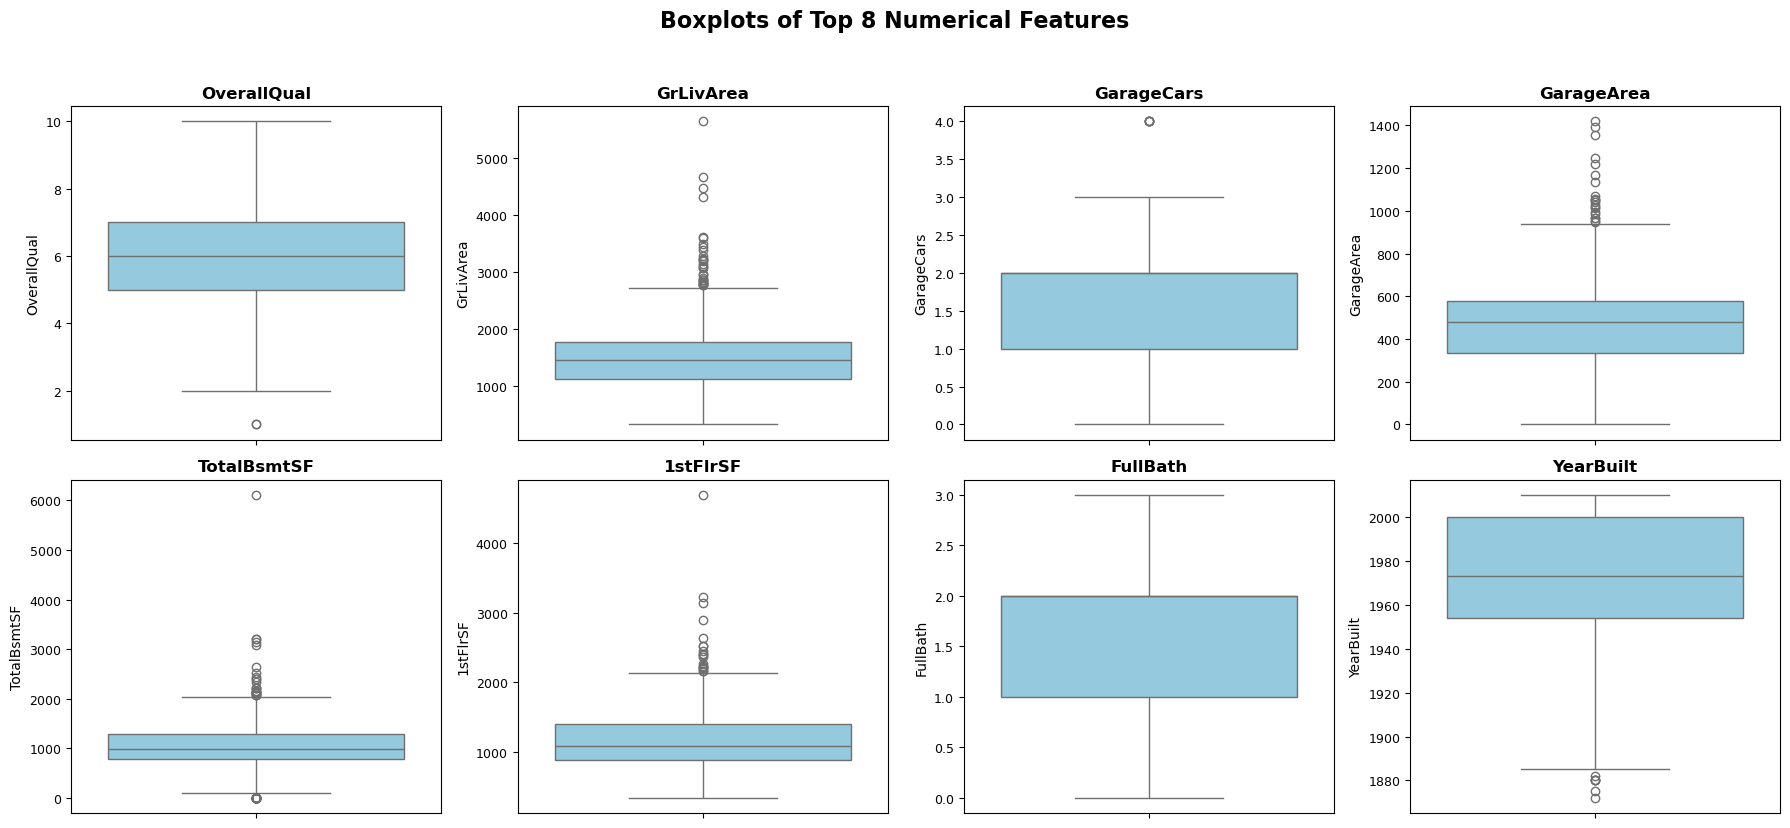

In [ ]:
# Chọn 8 đặc trưng numeric quan trọng nhất dựa trên tương quan với SalePrice
important_cols = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"
]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=house_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 8 Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
# droping values more than 50%
house_df = house_df.drop([
    "Id","Alley","PoolQC","Fence","MiscFeature"
    ], axis=1)

In [ ]:
# create training and validation sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    house_df,
    test_size=0.25,
    random_state=42
)

In [ ]:
y_train = train_df["SalePrice"].values
y_test = test_df["SalePrice"].values
train_df = train_df.drop(["SalePrice"], axis=1)
test_df = test_df.drop(["SalePrice"], axis=1)

In [ ]:
train_df.shape, test_df.shape

((1095, 75), (365, 75))

In [ ]:
num_cols = [col for col in train_df.columns if train_df[col].dtype in ["float64","int64"]]
cat_cols = [col for col in train_df.columns if train_df[col].dtype not in ["float64","int64"]]

In [ ]:
len(num_cols), len(cat_cols)

(36, 39)

In [ ]:
# fill none for categorical columns
train_df[cat_cols] = train_df[cat_cols].fillna("none")
test_df[cat_cols] = test_df[cat_cols].fillna("none")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(train_df[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols))

train_df[encoded_cols] = encoder.transform(train_df[cat_cols])
test_df[encoded_cols] = encoder.transform(test_df[cat_cols])

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
train_df[num_cols] = imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])

In [ ]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1023,120.0,RL,43.000000,3182.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
810,20.0,RL,78.000000,10140.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1384,50.0,RL,60.000000,9060.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
626,20.0,RL,70.394413,12342.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
813,20.0,RL,75.000000,9750.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20.0,RL,78.000000,9317.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,50.0,RL,65.000000,7804.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,20.0,RL,60.000000,8172.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,50.0,RL,55.000000,7642.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20.0,RL,70.000000,8414.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,60.0,RL,98.000000,12256.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,30.0,RM,56.000000,8960.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,50.0,RM,50.000000,5000.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,20.0,RL,89.000000,12898.0,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,60.0,RL,70.394413,12046.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
243,160.0,RL,75.000000,10762.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1342,60.0,RL,70.394413,9375.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1057,60.0,RL,70.394413,29959.0,Pave,IR2,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_num_features = scaler.fit_transform(train_df[num_cols])
test_num_features = scaler.transform(test_df[num_cols])

In [ ]:
X_train = np.hstack([train_num_features, train_df[encoded_cols].values])
X_test = np.hstack([test_num_features, test_df[encoded_cols].values])

In [ ]:
X_train.shape, y_train.shape

((1095, 282), (1095,))

In [ ]:
X_train

array([[0.58823529, 0.07534247, 0.00879665, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.19520548, 0.04131903, ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.13356164, 0.036271  , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.13356164, 0.0321204 , ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.11643836, 0.02964313, ..., 0.        , 1.        ,
        0.        ],
       [0.58823529, 0.10958904, 0.01114305, ..., 0.        , 1.        ,
        0.        ]], shape=(1095, 282))

In [ ]:
y_train

array([191000, 181000, 105000, ..., 115000, 189950, 174000], shape=(1095,))

In [ ]:
X_test.shape, y_test.shape

((365, 282), (365,))

In [ ]:
X_test

array([[0.        , 0.16780822, 0.03325154, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.26369863, 0.05120942, ..., 0.        , 1.        ,
        0.        ],
       [0.05882353, 0.11986301, 0.03580359, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.23529412, 0.16915895, 0.03774335, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.16915895, 0.13395499, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.17123288, 0.03694407, ..., 0.        , 1.        ,
        0.        ]], shape=(365, 282))

In [ ]:
y_test

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

# Training Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Tạo danh sách model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Khởi tạo list lưu kết quả
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

# Huấn luyện và tính metric
for name, model in models.items():
    regressor = model.fit(X_train, y_train)

    # Dự đoán
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Tính RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Tính R²
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Lưu kết quả
    model_names.append(name)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# Tạo DataFrame tổng hợp
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by="Test_R2", ascending=False)

df_results


,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
2,Lasso,20032.668558,26362.305805,0.933902,0.900794
0,LinearRegression,20029.220254,28136.997313,0.933925,0.886987
1,Ridge,22488.286583,28587.343381,0.916705,0.883340


# Advanced Techniques

## Training Polynomial Regression Model

In [33]:
train_df[num_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1023,120.0,43.000000,3182.0,7.0,5.0,2005.0,2006.0,14.0,16.0,0.0,...,437.0,156.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0
810,20.0,78.000000,10140.0,6.0,6.0,1974.0,1999.0,99.0,663.0,377.0,...,484.0,265.0,0.0,0.0,0.0,0.0,648.0,0.0,1.0,2006.0
1384,50.0,60.000000,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,0.0,...,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0
626,20.0,70.394413,12342.0,5.0,5.0,1960.0,1978.0,0.0,0.0,0.0,...,286.0,0.0,0.0,36.0,0.0,0.0,0.0,600.0,8.0,2007.0
813,20.0,75.000000,9750.0,6.0,6.0,1958.0,1958.0,243.0,608.0,0.0,...,301.0,0.0,0.0,275.0,0.0,0.0,0.0,500.0,4.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20.0,78.000000,9317.0,6.0,5.0,2006.0,2006.0,0.0,24.0,0.0,...,440.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0
1130,50.0,65.000000,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,0.0,...,576.0,431.0,44.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0
1294,20.0,60.000000,8172.0,5.0,7.0,1955.0,1990.0,0.0,167.0,0.0,...,572.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
860,50.0,55.000000,7642.0,7.0,8.0,1918.0,1998.0,0.0,0.0,0.0,...,216.0,0.0,240.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0


In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False
)

train_poly_features = poly_features.fit_transform(train_df[num_cols])
test_poly_features = poly_features.transform(test_df[num_cols])

In [35]:
train_poly_features

array([[1.2000e+02, 4.3000e+01, 3.1820e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0040e+04],
       [2.0000e+01, 7.8000e+01, 1.0140e+04, ..., 0.0000e+00, 0.0000e+00,
        2.0060e+03],
       [5.0000e+01, 6.0000e+01, 9.0600e+03, ..., 0.0000e+00, 0.0000e+00,
        2.0090e+04],
       ...,
       [2.0000e+01, 6.0000e+01, 8.1720e+03, ..., 0.0000e+00, 0.0000e+00,
        8.0240e+03],
       [5.0000e+01, 5.5000e+01, 7.6420e+03, ..., 0.0000e+00, 0.0000e+00,
        1.2042e+04],
       [1.2000e+02, 5.3000e+01, 3.6840e+03, ..., 0.0000e+00, 0.0000e+00,
        1.2054e+04]], shape=(1095, 666))

In [36]:
train_poly_features.shape

(1095, 666)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_poly_features = scaler.fit_transform(train_poly_features)
test_poly_features = scaler.transform(test_poly_features)

In [38]:
X_train_poly = np.hstack([train_poly_features, train_df[encoded_cols].values])
X_test_poly = np.hstack([test_poly_features, test_df[encoded_cols].values])

In [39]:
X_train_poly

array([[0.58823529, 0.07534247, 0.00879665, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.19520548, 0.04131903, ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.13356164, 0.036271  , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.13356164, 0.0321204 , ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.11643836, 0.02964313, ..., 0.        , 1.        ,
        0.        ],
       [0.58823529, 0.10958904, 0.01114305, ..., 0.        , 1.        ,
        0.        ]], shape=(1095, 912))

In [40]:
X_train_poly.shape, y_test.shape

((1095, 912), (365,))

In [41]:
X_test_poly.shape, y_test.shape

((365, 912), (365,))

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# making dictionary of models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# lists to store results
r2_results = []
rmse_results = []
train_rmse_results = []
train_r2_results = []
model_names = []

# training and evaluating each model
for name, model in models.items():
    regressor = model.fit(X_train_poly, y_train)

    # predict
    y_train_pred = regressor.predict(X_train_poly)
    y_test_pred = regressor.predict(X_test_poly)

    # metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # store
    model_names.append(name)
    train_rmse_results.append(train_rmse)
    rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    r2_results.append(test_r2)


# create dataframe
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": r2_results
}).sort_values(by="Test_R2", ascending=False)

df_results


,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
1,Ridge,16057.215172,27763.366559,0.957533,0.889969
2,Lasso,12063.654479,34402.874562,0.976030,0.831048
0,LinearRegression,9545.514116,55032.370851,0.984993,0.567676
